<a href="https://colab.research.google.com/github/ryaltic/Spaceship-Titanic-Kaggle/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryaltic/Spaceship-Titanic-Kaggle/refs/heads/main/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
df.head(n=10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
df['PassengerId'].is_unique

True

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Transported'])   # features
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=18,
    stratify=y
)



In [6]:
def add_passenger_group(df):
    df = df.copy()

    df['PassengerGroup'] = df['PassengerId'].str[:4]
    df = df.drop(columns=['PassengerId'])

    return df

X_train = add_passenger_group(X_train)
X_test  = add_passenger_group(X_test)

In [7]:
def get_duplicate_name_counts(df, name_col='Name'):
    name_counts = df[name_col].value_counts()
    return name_counts[name_counts > 1]

train_dupes = get_duplicate_name_counts(X_train)
test_dupes  = get_duplicate_name_counts(X_test)



In [8]:
def get_rows_with_duplicate_names(df, name_col='Name'):
    name_counts = df[name_col].value_counts()
    dupe_names = name_counts[name_counts > 1].index

    return (
        df[df[name_col].isin(dupe_names)]
        .sort_values(name_col)
    )

train_dupe_rows = get_rows_with_duplicate_names(X_train)
test_dupe_rows  = get_rows_with_duplicate_names(X_test)


In [9]:
X_train.drop(columns=['Name'], inplace=True)
X_train.head()

X_test.drop(columns=['Name'], inplace=True)
X_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
3177,Europa,False,E/234/S,TRAPPIST-1e,31.0,False,0.0,1216.0,0.0,897.0,478.0,3425
6205,NaN,False,B/253/S,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,6561
8345,Europa,False,D/280/P,TRAPPIST-1e,26.0,False,0.0,70.0,0.0,41.0,NaN,8920
7490,Earth,True,G/1294/S,TRAPPIST-1e,38.0,False,0.0,0.0,0.0,0.0,0.0,8014
1734,Earth,False,G/290/S,TRAPPIST-1e,65.0,False,5.0,317.0,NaN,0.0,123.0,1847


In [10]:
X_train.groupby('HomePlanet').count()
X_test.groupby('HomePlanet').count()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
HomePlanet,,,,,,,,,,,
Earth,920,915,914,926,911,923,916,916,917,918,938
Europa,379,376,384,384,387,386,383,382,382,382,391
Mars,367,372,368,368,369,370,370,367,374,371,378


In [11]:
X_train.groupby('Destination').count()
X_test.groupby('Destination').count()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup
Destination,,,,,,,,,,,
55 Cancri e,331,321,321,328,324,330,326,320,324,327,333
PSO J318.5-22,156,153,153,155,154,153,153,156,152,156,156
TRAPPIST-1e,1179,1182,1179,1183,1179,1184,1180,1179,1186,1177,1207


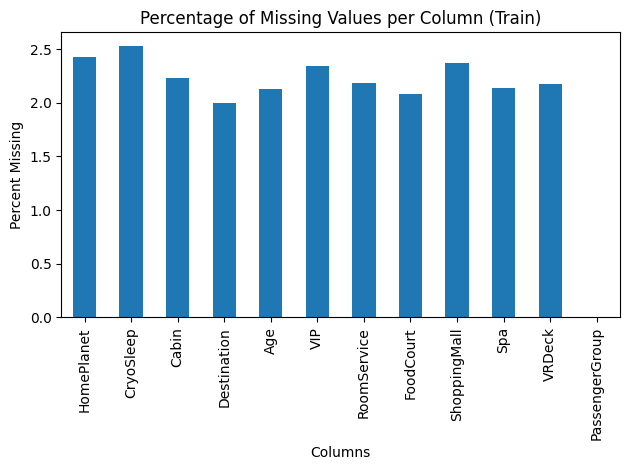

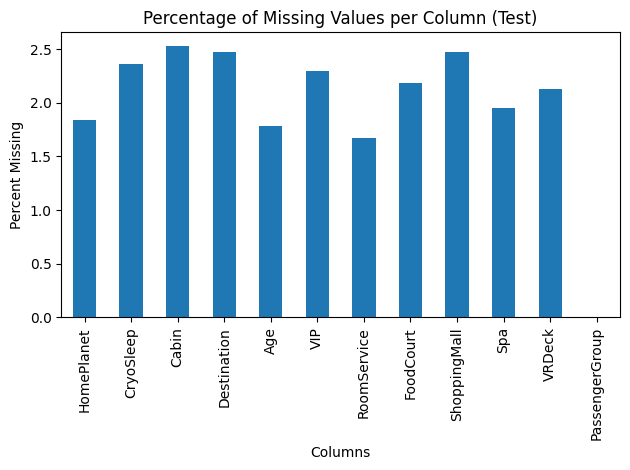

In [12]:
import matplotlib.pyplot as plt

def plot_missing_percentages(df, title_suffix=""):
    missing_pct = df.isna().mean() * 100

    missing_pct.plot(kind='bar')
    plt.title(f"Percentage of Missing Values per Column {title_suffix}")
    plt.ylabel("Percent Missing")
    plt.xlabel("Columns")
    plt.tight_layout()
    plt.show()

plot_missing_percentages(X_train, "(Train)")
plot_missing_percentages(X_test, "(Test)")



In [13]:
missing_cols = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
    'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]

# Create a single flag: 1 if any of the listed columns is missing, else 0
X_train['Any_Missing'] = X_train[missing_cols].isna().any(axis=1).astype(int)
X_test['Any_Missing']  = X_test[missing_cols].isna().any(axis=1).astype(int)



In [14]:
def split_cabin(df):
    df = df.copy()

    df['Deck'] = df['Cabin'].str.split('/').str[0]
    df['Side'] = df['Cabin'].str.split('/').str[2]
    df = df.drop(columns=['Cabin'])

    return df

X_train = split_cabin(X_train)
X_test  = split_cabin(X_test)


In [15]:
from sklearn.impute import SimpleImputer

numeric_cols = X_train.select_dtypes(include="number").columns
num_imputer = SimpleImputer(strategy="median")

X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])

cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns
cat_cols = cat_cols.drop('PassengerGroup', errors='ignore')

cat_imputer = SimpleImputer(strategy="most_frequent")

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])


In [16]:
import matplotlib.pyplot as plt

def plot_missing_percentages(df, title_suffix=""):
    missing_pct = df.isna().mean() * 100
    missing_pct = missing_pct[missing_pct > 0]  # only columns with missing values

    if missing_pct.empty:
        print(f"No missing values found {title_suffix}")
        return

    missing_pct.plot(kind='bar', figsize=(10,5))
    plt.title(f"Percentage of Missing Values per Column {title_suffix}")
    plt.ylabel("Percent Missing")
    plt.xlabel("Columns")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_missing_percentages(X_train, "(Train)")
plot_missing_percentages(X_test, "(Test)")


No missing values found (Train)
No missing values found (Test)


In [17]:
def add_group_sum_features(df, group_col, bool_cols, drop_group_col=True):
    df = df.copy()

    for col in bool_cols:
        df[f"group_{col}"] = (
            df.groupby(group_col)[col]
              .transform(lambda x: x.astype(int).sum())
        )

    if drop_group_col:
        df = df.drop(columns=[group_col])

    return df

bool_cols = ['VIP', 'CryoSleep']

X_train = add_group_sum_features(
    X_train,
    group_col='PassengerGroup',
    bool_cols=bool_cols
)

X_test = add_group_sum_features(
    X_test,
    group_col='PassengerGroup',
    bool_cols=bool_cols
)


In [18]:
def add_total_spend(df):
    df = df.copy()

    spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df['TotalSpend'] = df[spend_cols].sum(axis=1)

    return df

X_train = add_total_spend(X_train)
X_test  = add_total_spend(X_test)



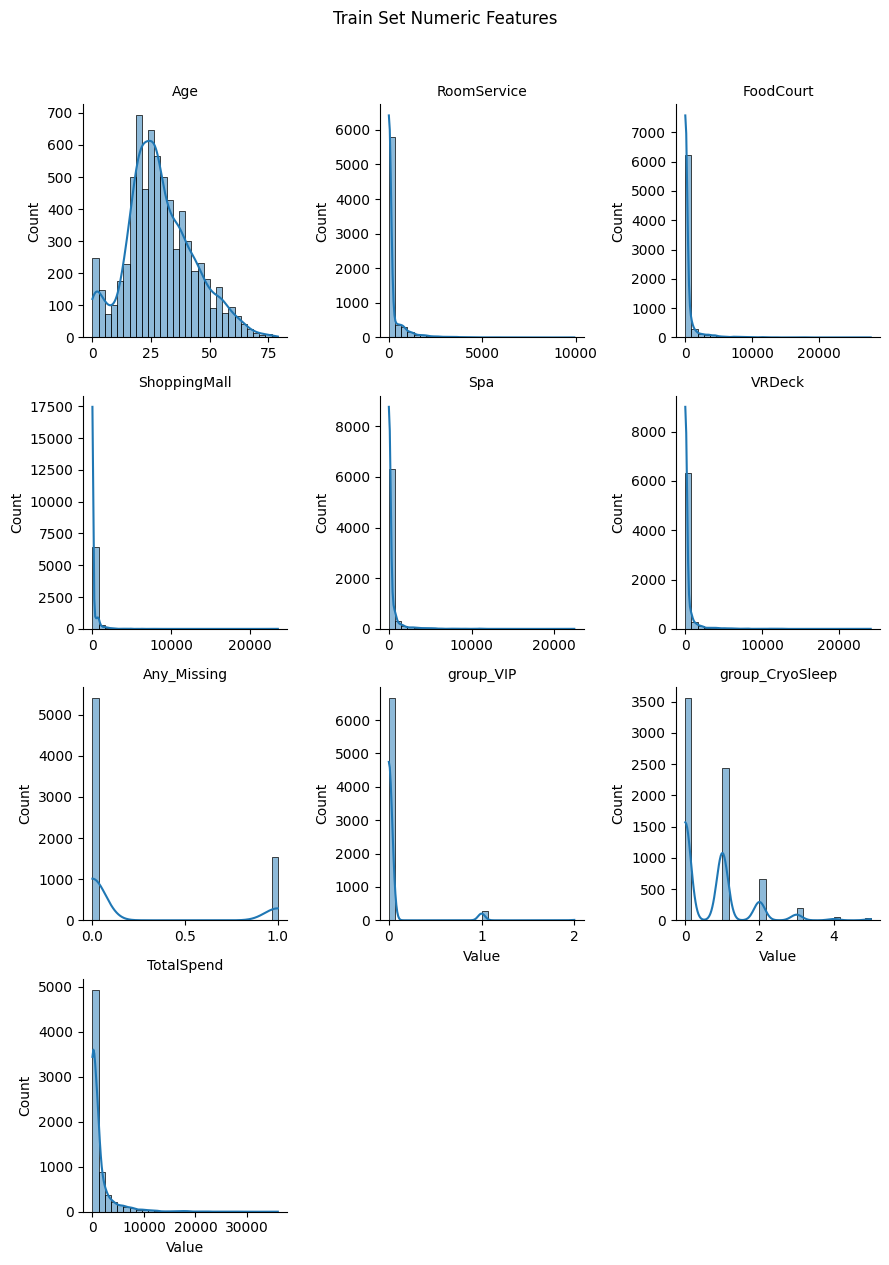

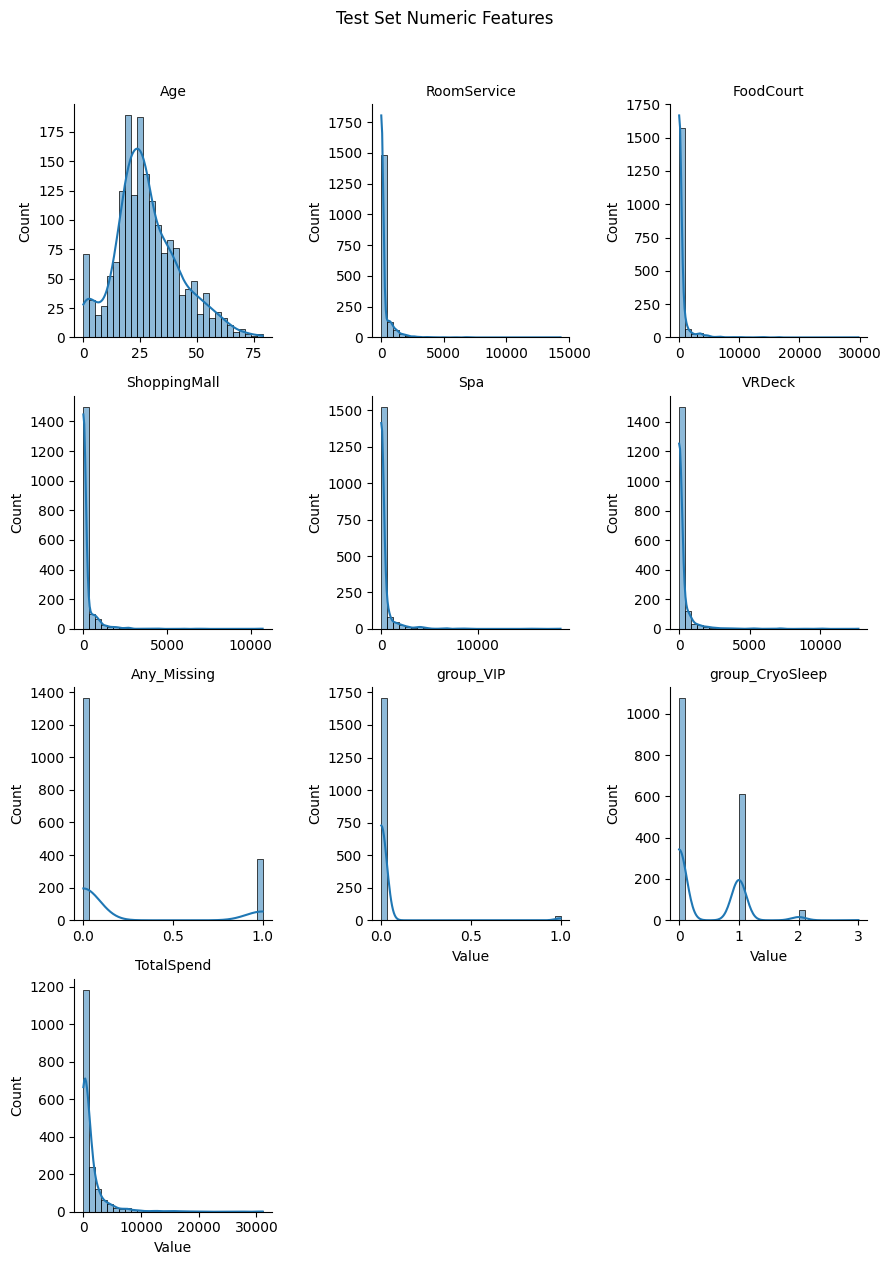

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_numeric_distributions(df, title="Distribution of Numeric Features", col_wrap=3, bins=30, kde=True):
    numeric_columns = df.select_dtypes(include="number")
    if numeric_columns.empty:
        print("No numeric columns found.")
        return

    # Melt to long format
    df_long = numeric_columns.melt(var_name="Feature", value_name="Value")

    # FacetGrid
    g = sns.FacetGrid(
        df_long,
        col="Feature",
        col_wrap=col_wrap,
        sharex=False,
        sharey=False
    )

    g.map(sns.histplot, "Value", bins=bins, kde=kde)
    g.set_titles("{col_name}")
    g.fig.suptitle(title, y=1.05)

    plt.show()

plot_numeric_distributions(X_train, title="Train Set Numeric Features")
plot_numeric_distributions(X_test, title="Test Set Numeric Features")



In [20]:
# Potentially logging RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
# or just Target Variable
# Could create binned variables

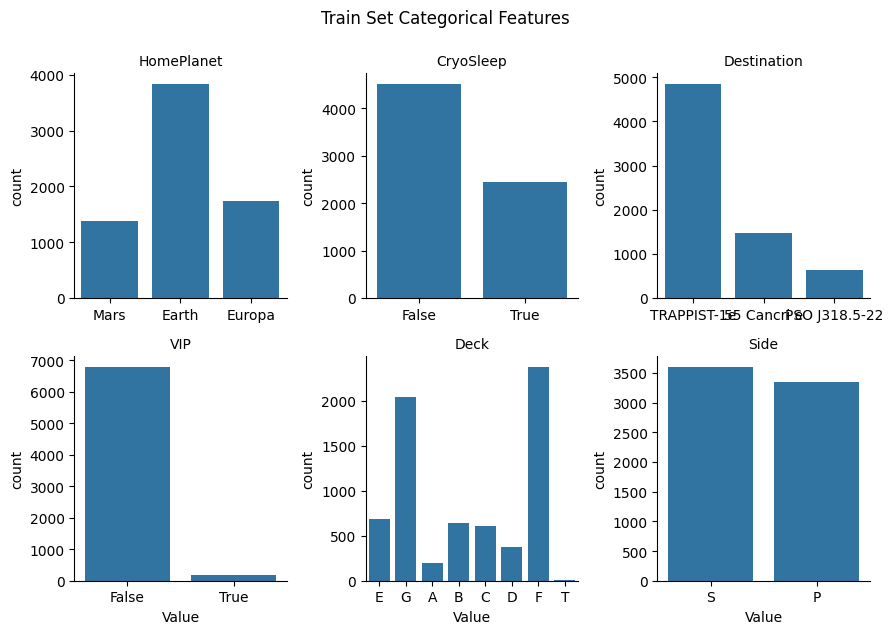

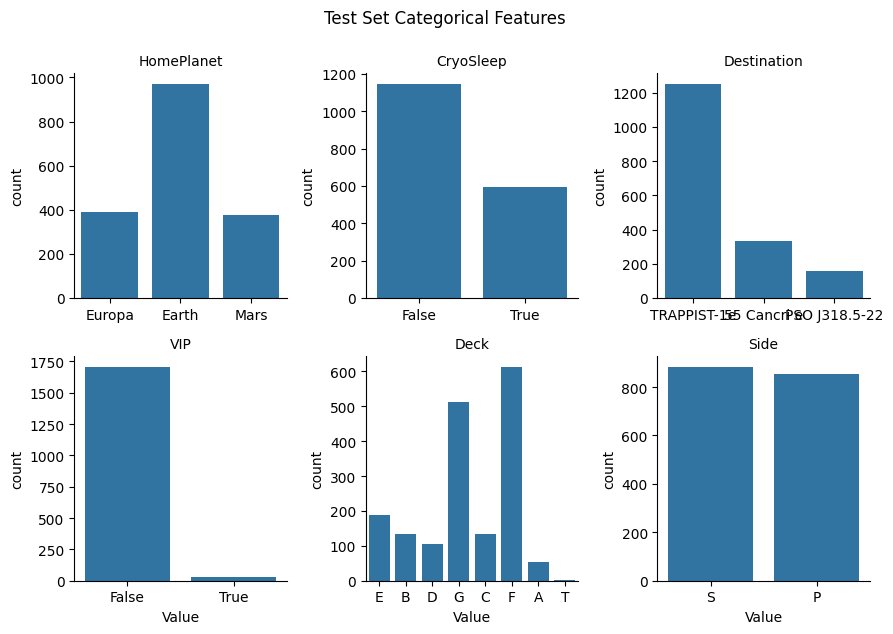

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_categorical_counts(df, title="Counts of Categorical Features", col_wrap=3):
    cat_columns = df.select_dtypes(include=["object", "category", "bool"])
    if cat_columns.empty:
        print("No categorical columns found.")
        return

    # Melt to long format
    df_long = cat_columns.melt(var_name="Feature", value_name="Value")

    # FacetGrid
    g = sns.FacetGrid(
        df_long,
        col="Feature",
        col_wrap=col_wrap,
        sharex=False,
        sharey=False
    )

    g.map(sns.countplot, "Value", order=None)
    g.set_titles("{col_name}")
    g.fig.suptitle(title, y=1.05)

    plt.show()

plot_categorical_counts(X_train, title="Train Set Categorical Features")
plot_categorical_counts(X_test, title="Test Set Categorical Features")



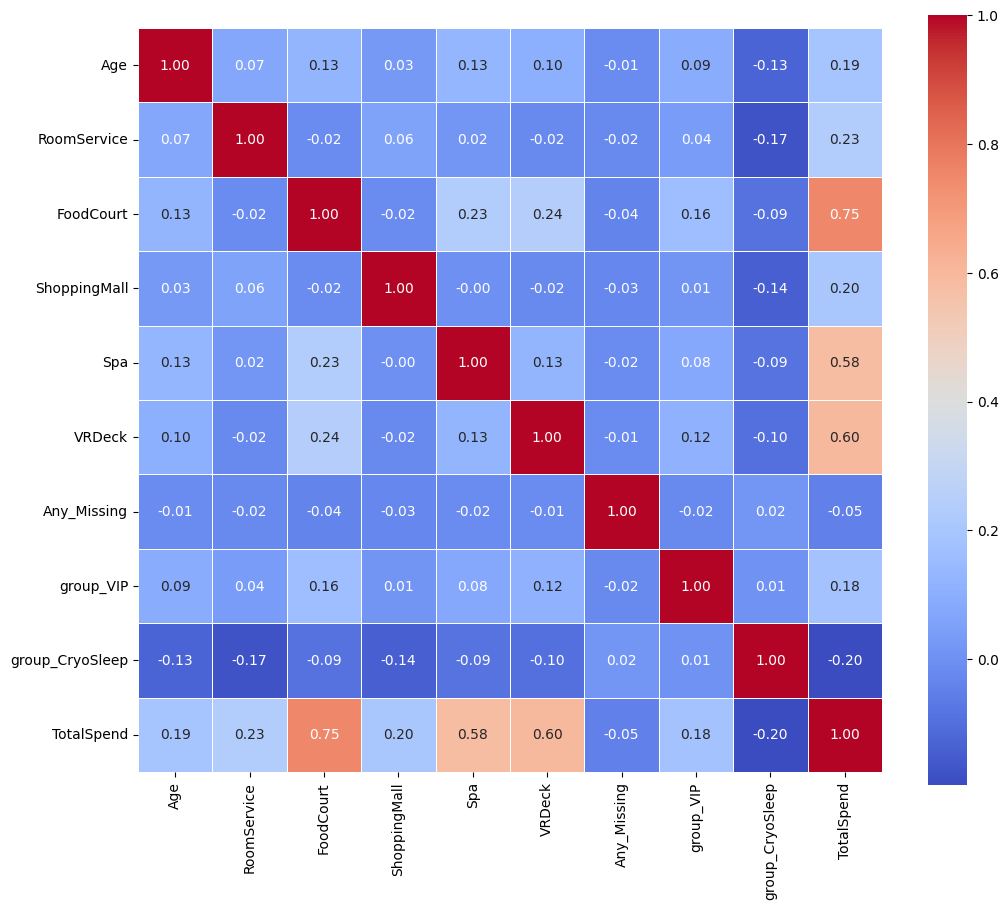

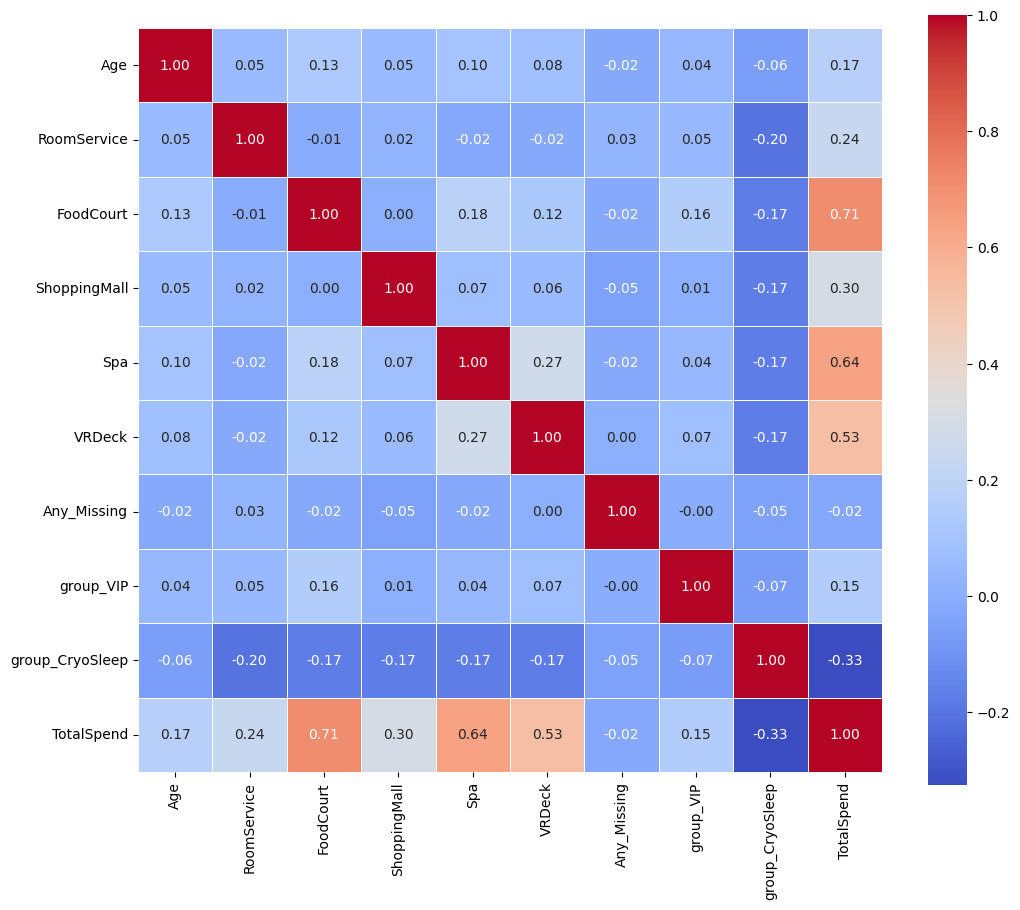

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, title="Correlation Matrix (Numeric Features)", figsize=(12, 10), cmap="coolwarm"):
    numeric_columns = df.select_dtypes(include="number")
    if numeric_columns.empty:
        print("No numeric columns found.")
        return

    corr = numeric_columns.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        square=True,
        cbar=True,
        linewidths=0.5
    )
    plt.title

plot_correlation_matrix(X_train, title="Train Set Numeric Correlations")
plot_correlation_matrix(X_test, title="Test Set Numeric Correlations")


In [23]:
X_train_dummies = pd.get_dummies(X_train, columns=cat_cols, drop_first=False)
X_test_dummies  = pd.get_dummies(X_test, columns=cat_cols, drop_first=False)

X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='left', axis=1)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [25]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include='number').columns

scaler = StandardScaler()

# Copy original data
X_train_scaled = X_train_dummies.copy()
X_test_scaled  = X_test_dummies.copy()

# Scale numeric columns
X_train_scaled[num_cols] = scaler.fit_transform(X_train_dummies[num_cols])
X_test_scaled[num_cols]  = scaler.transform(X_test_dummies[num_cols])


In [26]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    random_state=18
)

logit.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=18)

In [27]:
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear"]  # supports both L1 & L2
}

grid = GridSearchCV(
    estimator=logit,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=18),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [28]:
grid.best_params_
grid.best_score_


np.float64(0.7917746665356427)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_log_reg = grid.best_estimator_

y_test_pred = best_log_reg.predict(X_test_scaled)

accuracy_score(y_test, y_test_pred)
classification_report(y_test, y_test_pred)
confusion_matrix(y_test, y_test_pred)



array([[668, 195],
       [187, 689]])

In [30]:
coef_df = (
    pd.DataFrame({
        'feature': X_train_scaled.columns,
        'coef': logit.coef_[0]
    })
    .assign(abs_coef=lambda x: x.coef.abs())
    .sort_values('abs_coef', ascending=False)
)

coef_df.head(15)


,feature,coef,abs_coef
4,Spa,-1.877005,1.877005
5,VRDeck,-1.863439,1.863439
22,Deck_C,1.442377,1.442377
2,FoodCourt,1.266164,1.266164
11,HomePlanet_Europa,0.946022,0.946022
20,Deck_A,-0.896690,0.896690
9,TotalSpend,-0.886657,0.886657
1,RoomService,-0.796250,0.796250
10,HomePlanet_Earth,-0.753406,0.753406
13,CryoSleep_False,-0.692544,0.692544


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=18,
    n_jobs=-1
)

cv_scores = cross_val_score(
    rf_base,
    X_train_dummies,
    y_train,
    cv=5,
    scoring="accuracy"
)

print(f"Baseline CV Accuracy: {cv_scores.mean():.4f}")


Baseline CV Accuracy: 0.7837


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [150, 175],
    "max_depth": [None],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [4, 5, 6],
    "max_features": ["sqrt", "log2"],
    "max_samples": [None, 0.6, 0.8]
}

rf = RandomForestClassifier(
    random_state=18,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_dummies, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=18),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 'log2'],
                         'max_samples': [None, 0.6, 0.8],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 175]},
             scoring='accuracy', verbose=2)

In [33]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 150}
0.8032792515089294


In [34]:
from sklearn.metrics import accuracy_score, classification_report

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_dummies)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.79700977573318
              precision    recall  f1-score   support

       False       0.79      0.81      0.80       863
        True       0.81      0.79      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [35]:
import pandas as pd

importances = pd.Series(
    best_rf.feature_importances_,
    index=X_train_dummies.columns
).sort_values(ascending=False)

importances.head(15)


,0
TotalSpend,0.148864
CryoSleep_False,0.097549
FoodCourt,0.088414
Spa,0.086480
VRDeck,0.084459
RoomService,0.081409
Age,0.065093
ShoppingMall,0.064425
CryoSleep_True,0.064048
group_CryoSleep,0.052900


In [36]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [37]:
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=18,
    n_jobs=-1
)


In [38]:
binary_cols = ['group_VIP', 'group_CryoSleep']

for col in binary_cols:
    X_train_dummies[col] = (
        X_train_dummies[col]
        .astype(str)
        .str.lower()
        .map({'true': 1, 'false': 0})
    )

    X_test_dummies[col] = (
        X_test_dummies[col]
        .astype(str)
        .str.lower()
        .map({'true': 1, 'false': 0})
    )


In [39]:
xgb_base.fit(X_train_dummies, y_train)

y_pred = xgb_base.predict(X_test_dummies)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))


Baseline Accuracy: 0.8004600345025877


In [40]:
param_grid = {
    "n_estimators": [335, 337],
    "learning_rate": [0.0535, 0.0525],
    "max_depth": [4],
    "subsample": [0.725, 0.75, 0.775],
    "colsample_bytree": [0.825, 0.85, 0.875]
}


In [41]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=18,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_dummies, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.825, 0.85, 0.875],
                         'learning_rate': [0.0535, 0.0525], 'max_depth': [4],
                         'n_estimators': [335, 337],
                         'subsample': [0.725, 0.75, 0.775]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best CV Accuracy:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)

In [ ]:
best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test_dummies)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd

importance = pd.Series(
    best_xgb.feature_importances_,
    index=X_train_dummies.columns
).sort_values(ascending=False)

importance.head(20)


In [ ]:
test_data = pd.read_csv("https://raw.githubusercontent.com/ryaltic/Spaceship-Titanic-Kaggle/refs/heads/main/test.csv")
test_df = test_data.copy()
test_df.head()

In [ ]:
test_df = add_passenger_group(test_df)

get_duplicate_name_counts(test_df)

get_rows_with_duplicate_names(test_df)

test_df = test_df.drop(columns=['Name'], axis=1)

plot_missing_percentages(test_df)

test_df['Any_Missing']  = test_df[missing_cols].isna().any(axis=1).astype(int)

test_df = split_cabin(test_df)

test_df.head()

In [ ]:
test_df[numeric_cols] = num_imputer.transform(test_df[numeric_cols])

test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

plot_missing_percentages(test_df)

test_df = add_group_sum_features(
    test_df,
    group_col='PassengerGroup',
    bool_cols=bool_cols
)

test_df = add_total_spend(test_df)

plot_numeric_distributions(test_df)

plot_categorical_counts(test_df)

plot_correlation_matrix(test_df)

test_df_dummies = pd.get_dummies(
    test_df,
    columns=cat_cols,
    drop_first=False
)

# align columns to training set
test_df_dummies = test_df_dummies.reindex(
    columns=X_train_dummies.columns,
    fill_value=0
)

test_df_scaled = test_df_dummies.copy()

test_df_scaled[num_cols] = scaler.transform(test_df_dummies[num_cols])


binary_cols = ['group_VIP', 'group_CryoSleep']

for col in binary_cols:
    test_df_dummies[col] = (
        test_df_dummies[col]
        .astype(str)
        .str.lower()
        .map({'true': 1, 'false': 0})
    )


In [ ]:
print(X_train_dummies.info())
print(X_test_dummies.info())

In [ ]:
print(X_train_scaled.info())
print(X_test_scaled.info())

In [ ]:
print(test_df_dummies.info())
print(test_df_scaled.info())

In [51]:
print(test_df_dummies.head())
print(test_df_scaled.head())


    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Any_Missing  \
0  27.0          0.0        0.0           0.0     0.0     0.0          0.0   
1  19.0          0.0        9.0           0.0  2823.0     0.0          0.0   
2  31.0          0.0        0.0           0.0     0.0     0.0          0.0   
3  38.0          0.0     6652.0           0.0   181.0   585.0          0.0   
4  20.0         10.0        0.0         635.0     0.0     0.0          0.0   

   group_VIP  group_CryoSleep  TotalSpend  ...  Deck_A  Deck_B  Deck_C  \
0        NaN              NaN         0.0  ...   False   False   False   
1        NaN              NaN      2832.0  ...   False   False   False   
2        NaN              NaN         0.0  ...   False   False    True   
3        NaN              NaN      7418.0  ...   False   False    True   
4        NaN              NaN       645.0  ...   False   False   False   

   Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0   False   False   False 

In [52]:
test_xgb = best_xgb.predict(test_df_dummies)
test_rf = best_rf.predict(test_df_dummies)
test_log = best_log_reg.predict(test_df_scaled)

In [57]:
prediction_df_xgb = test_data['PassengerId'].to_frame()
prediction_df_xgb['Transported'] = test_xgb.astype(bool)
print(prediction_df_xgb.head())
prediction_df_xgb.to_csv('prediction_df_xgb.csv', index=False)

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [58]:
prediction_df_rf = test_data['PassengerId'].to_frame()
prediction_df_rf['Transported'] = test_rf.astype(bool)
print(prediction_df_rf.head())
prediction_df_rf.to_csv('prediction_df_rf.csv', index=False)

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [59]:
prediction_df_log = test_data['PassengerId'].to_frame()
prediction_df_log['Transported'] = test_log.astype(bool)
print(prediction_df_log.head())
prediction_df_log.to_csv('prediction_df_log.csv', index=False)

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [56]:
# Things to do
# Documenation